In [ ]:
pip install tensorflow keras torch torchvision numpy matplotlib


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


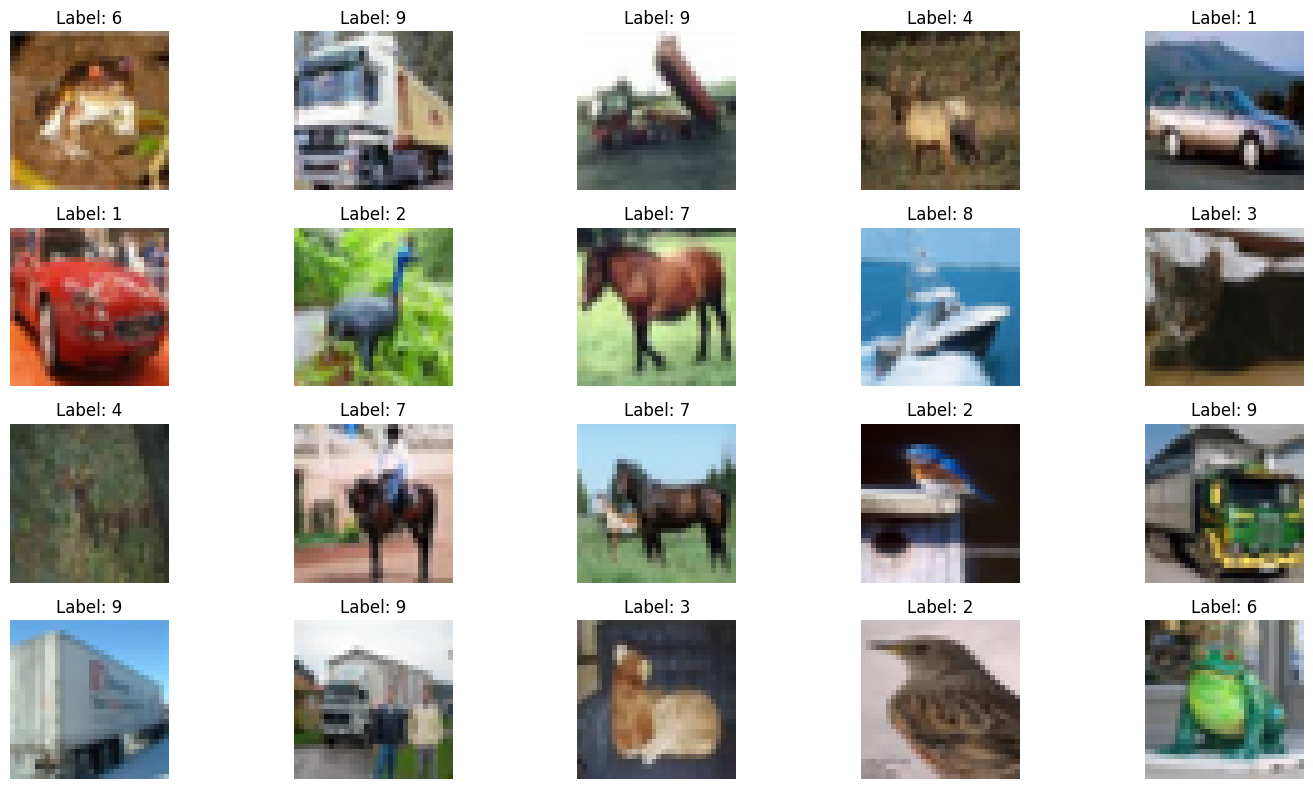

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display some images from the dataset
fig, axes = plt.subplots(4, 5, figsize=(15, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=32
EPOCHS=10
CHANNELS=3

In [ ]:
dataset = cifar10.load_data()
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_size = 0.8
train_sample = len(dataset)*train_size

In [ ]:
train_sample

40000.0

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load ResNet50 without the top (classification) layer, with weights from ImageNet
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model layers to retain the learned features
base_model.trainable = False

# Define the model on top of the pre-trained ResNet50 base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    layers.Dense(64, activation='relu'),
    layers.Dense(CHANNELS, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Resizing(224, 224, input_shape=(32, 32, 3)),
    tf.keras.applications.ResNet50(weights=None, classes=10)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test),batch_size=32)
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=32)

Epoch 1/15
   9/1563 ━━━━━━━━━━━━━━━━━━━━ 6:50 264ms/step - accuracy: 0.1209 - loss: 4.7430

In [ ]:
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.8234999775886536
